# AMM price prediction - An exmple based usecase

**This is a machine learning model to predict A specific token's price!**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

Select rows that are useful

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import tensorflow as tf

df = pd.read_csv('../input/cryptocurrencypricehistory/coin_Dogecoin.csv')
df.drop(columns = ['SNo','Name','Symbol','Open','Close', 'Volume', 'Marketcap', "Low"], axis=1,errors='ignore', inplace = True)
# df['Date'] = df["Date"].dt.strftime('%y-%m-%d')
df['Date'] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = df['Date'].astype('datetime64[ns]')

df.set_index("Date", inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2760 entries, 2013-12-16 to 2021-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2760 non-null   float64
dtypes: float64(1)
memory usage: 43.1 KB


Convert the dataframe into numpy arrays. (to perform complex nmpy functions)

In [3]:
timesteps = df.index.to_numpy()
prices = df["High"].to_numpy()
timesteps = tf.convert_to_tensor(df.index.values.astype(np.int64))

timesteps[:10], prices[:10]

(<tf.Tensor: shape=(10,), dtype=int64, numpy=
 array([1387152000000000000, 1387238400000000000, 1387324800000000000,
        1387411200000000000, 1387497600000000000, 1387584000000000000,
        1387670400000000000, 1387756800000000000, 1387843200000000000,
        1387929600000000000])>,
 array([0.00086587, 0.00028879, 0.00036163, 0.00151967, 0.00114292,
        0.00070049, 0.00049758, 0.00045953, 0.00091305, 0.00069368]))

Split the data into 80% training data, and 20% test data.

In [4]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2208, 552, 2208, 552)

Now, let's plot the Dogecoin price.

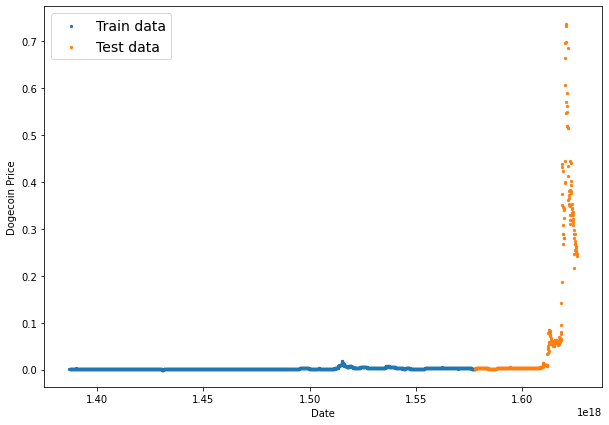

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Dogecoin Price")
plt.legend(fontsize=14)
plt.show();

Function to plt data :-

In [7]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
 
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Dogecoin Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

First of all, we could get on with the naive forecasting!

In [8]:
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([0.00211001, 0.00217721, 0.00248978, 0.0024913 , 0.00256355,
        0.0024968 , 0.00246518, 0.00231418, 0.00236058, 0.0023729 ]),
 array([0.25512667, 0.26689135, 0.26698212, 0.27493964, 0.2635378 ,
        0.26009185, 0.24799679, 0.25021383, 0.25256665, 0.24641907]))

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [12]:
y_true = tf.cast(y_test[1:], dtype=tf.float32)
y_pred = tf.cast(naive_forecast, dtype=tf.float32)

  # mean absolute error between true and predicted
mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
print(mae)

tf.Tensor(0.0059012035, shape=(), dtype=float32)


Let's plot the data using plot_time_series function.

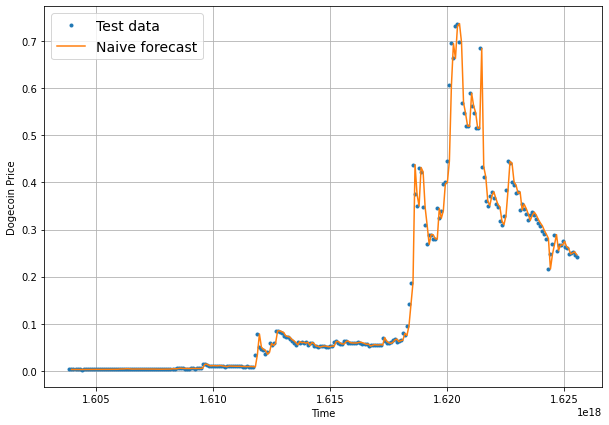

In [13]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Let's make a windows and horizons.

Input of WINDOW_SIZE = 7 and output of HORIZON = 1.

In [15]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

Make a function that you can pass in an array and then split the array into 2 arrays. First array will contain numbers that are from the start till the total number minus the amount of horizon.

In [16]:
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

Let's make a function that you can actually make the windows.

In [19]:
def make_windows(x, window_size=7, horizon=1):
    window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

Let's check that the make_windows function works and create windows and labels for the whole data.

In [20]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
# train_windows, train_labels, test_windows, test_labels
full_windows, full_labels

(array([[0.00086587, 0.00028879, 0.00036163, ..., 0.00114292, 0.00070049,
         0.00049758],
        [0.00028879, 0.00036163, 0.00151967, ..., 0.00070049, 0.00049758,
         0.00045953],
        [0.00036163, 0.00151967, 0.00114292, ..., 0.00049758, 0.00045953,
         0.00091305],
        ...,
        [0.26689135, 0.26698212, 0.27493964, ..., 0.26009185, 0.24799679,
         0.25021383],
        [0.26698212, 0.27493964, 0.2635378 , ..., 0.24799679, 0.25021383,
         0.25256665],
        [0.27493964, 0.2635378 , 0.26009185, ..., 0.25021383, 0.25256665,
         0.24641907]]),
 array([[0.00045953],
        [0.00091305],
        [0.00069368],
        ...,
        [0.25256665],
        [0.24641907],
        [0.24190981]]))

Checking that the datas are stored correctly.

In [21]:
for i in range(3):
    print(f'{full_windows[i]}, {full_labels[i]}')

[0.00086587 0.00028879 0.00036163 0.00151967 0.00114292 0.00070049
 0.00049758], [0.00045953]
[0.00028879 0.00036163 0.00151967 0.00114292 0.00070049 0.00049758
 0.00045953], [0.00091305]
[0.00036163 0.00151967 0.00114292 0.00070049 0.00049758 0.00045953
 0.00091305], [0.00069368]


Making a function that you can split the windows and the labels 80% training data and 20% test data.

In [22]:
def split_train_test(windows, labels):
    split_windows = int(0.8 * len(windows))
    split_labels = int(0.8 * len(labels))  # 80% train, 20% test
    # Create train data splits (everything before the split)
    x_train, x_test = windows[:split_windows], windows[split_windows:]

    # Create test data splits (everything after the split)
    y_train, y_test = labels[:split_labels], labels[split_labels:]

    return x_train, x_test, y_train, y_test

Let's just check that the datas are splited correctly by looking at the length of the data.

In [23]:
train_windows, test_windows, train_labels, test_labels = split_train_test(full_windows, full_labels)
# train_windows, test_windows, train_labels, test_labels
# len(full_windows), len(full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2202, 551, 2202, 551)

Checking the actual data.

In [24]:
train_windows[:5], test_windows[:5], train_labels[:5], test_labels[:5]

(array([[0.00086587, 0.00028879, 0.00036163, 0.00151967, 0.00114292,
         0.00070049, 0.00049758],
        [0.00028879, 0.00036163, 0.00151967, 0.00114292, 0.00070049,
         0.00049758, 0.00045953],
        [0.00036163, 0.00151967, 0.00114292, 0.00070049, 0.00049758,
         0.00045953, 0.00091305],
        [0.00151967, 0.00114292, 0.00070049, 0.00049758, 0.00045953,
         0.00091305, 0.00069368],
        [0.00114292, 0.00070049, 0.00049758, 0.00045953, 0.00091305,
         0.00069368, 0.00070573]]),
 array([[0.0020751 , 0.00209028, 0.00211417, 0.00207719, 0.00205636,
         0.0020521 , 0.00211001],
        [0.00209028, 0.00211417, 0.00207719, 0.00205636, 0.0020521 ,
         0.00211001, 0.00217721],
        [0.00211417, 0.00207719, 0.00205636, 0.0020521 , 0.00211001,
         0.00217721, 0.00248978],
        [0.00207719, 0.00205636, 0.0020521 , 0.00211001, 0.00217721,
         0.00248978, 0.0024913 ],
        [0.00205636, 0.0020521 , 0.00211001, 0.00217721, 0.00248978,
  

Now let's make the actual machine learning model.

The output is going to be HORIZON which will be 1 in our case.

In [25]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_1.compile(loss='mae',
             optimizer='adam')

model_1.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100, verbose=1, validation_data=(test_windows, test_labels))
model_1.summary()

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 0.0306
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 4.0787e-04 - val_loss: 0.0243
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 3.6246e-04 - val_loss: 0.0237
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2.2377e-04 - val_loss: 0.0248
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 2.0467e-04 - val_loss: 0.0279
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 2.2287e-04 - val_loss: 0.0286
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 2.3178e-04 - val_loss: 0.0262
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3169e-04 - val_loss: 0.0265
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 2.9516e-04 - val_loss: 0.0267
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 2.

In [26]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 0.0330


0.03299931064248085

In [27]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [28]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.00227076, 0.00230304, 0.00242489, 0.00252193, 0.00259975,
        0.00264236, 0.00264691, 0.0026033 , 0.00257795, 0.00256769],
       dtype=float32)>)

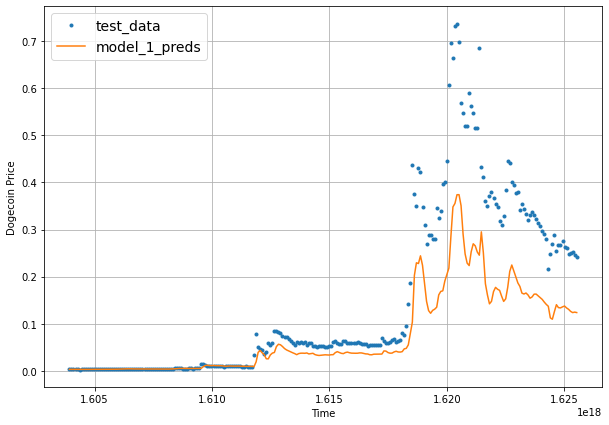

In [29]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds") 